In [3]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
te.login('jupyter:jupyter')

In [5]:
raw_data = te.fetchMarkets(symbol=['BTCUSD:CUR', 'ETHUSD:CUR'], initDate='2021-01-01', output_type='df')

In [6]:
raw_btc_data = raw_data.loc[raw_data['symbol'] == 'BTCUSD:CUR']
raw_eth_data = raw_data.loc[raw_data['symbol'] == 'ETHUSD:CUR']

In [7]:
bitcoin = raw_btc_data[['close']].rename(columns={'close': 'Bitcoin'})
bitcoin.index.name = 'Date'

etherum = raw_eth_data[['close']].rename(columns={'close': 'Etherum'})
etherum.index.name = 'Date'

In [8]:
df = pd.merge(bitcoin, etherum, on='Date')
df.sort_values(by='Date', inplace=True, ascending=True)

In [9]:
df

,Bitcoin,Etherum
Date,,
2021-01-01,29398.90000,730.85000
2021-01-02,32238.80000,775.01000
2021-01-03,33082.70000,979.86000
2021-01-04,32048.00000,1042.52000
2021-01-05,34050.00000,1103.41000
...,...,...
2022-06-02,30212.22000,1821.63000
2022-06-03,29638.00000,1757.60000
2022-06-04,29638.00000,1757.60000


**Adding two axis**

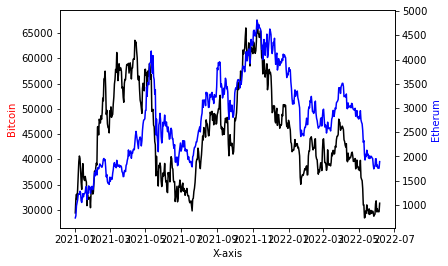

In [10]:
# Create Plot



fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Bitcoin', color = 'red') 
ax1.plot(df.index.tolist(), df['Bitcoin'].values.tolist(), color = 'black') 
ax1.tick_params(axis ='y') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Etherum', color = 'blue') 
ax2.plot(df.index.tolist(), df['Etherum'].values.tolist(), color = 'blue') 
ax2.tick_params(axis ='y') 
 
# Show plot 
plt.show()

**Correlation between Bitcoin and Etherum**

In [14]:
col1, col2 = "Bitcoin", "Etherum"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  Bitcoin  and  Etherum is:  0.54
